### Dataset Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

In [8]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
  
# fetch dataset 
data = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)
  
# metadata 
print(data.metadata) 
  
# variable information 
print(data.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [11]:
# Display the first 5 rows of the dataset
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<Axes: xlabel='Diagnosis', ylabel='count'>

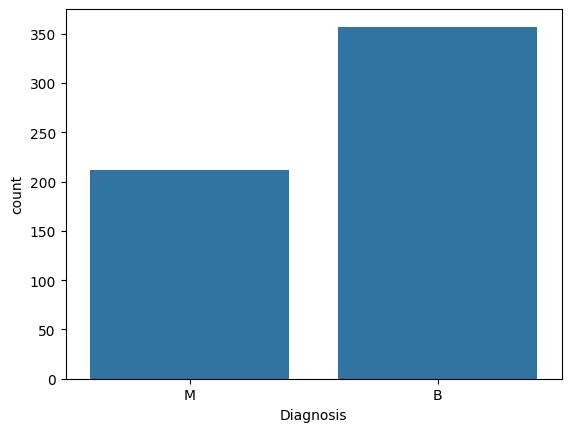

In [ ]:
import seaborn as sns

# Show distribution of target variable "Diagnosis"
sns.countplot(data=df, x="Diagnosis")

In [18]:
# convert the target variable to binary
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [19]:
correlation_matrix = df.corr()
print(correlation_matrix)

                     radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
symmetry1           0.147741  0.071401    0.183027  0.151293     0.557775   
fractal_dimension1 -0.311631 -0.076437   -0.261477 -0.283110     0.584792   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
texture2           -0.097317  0.386358   -0.086761 -0.066280     0.068406   

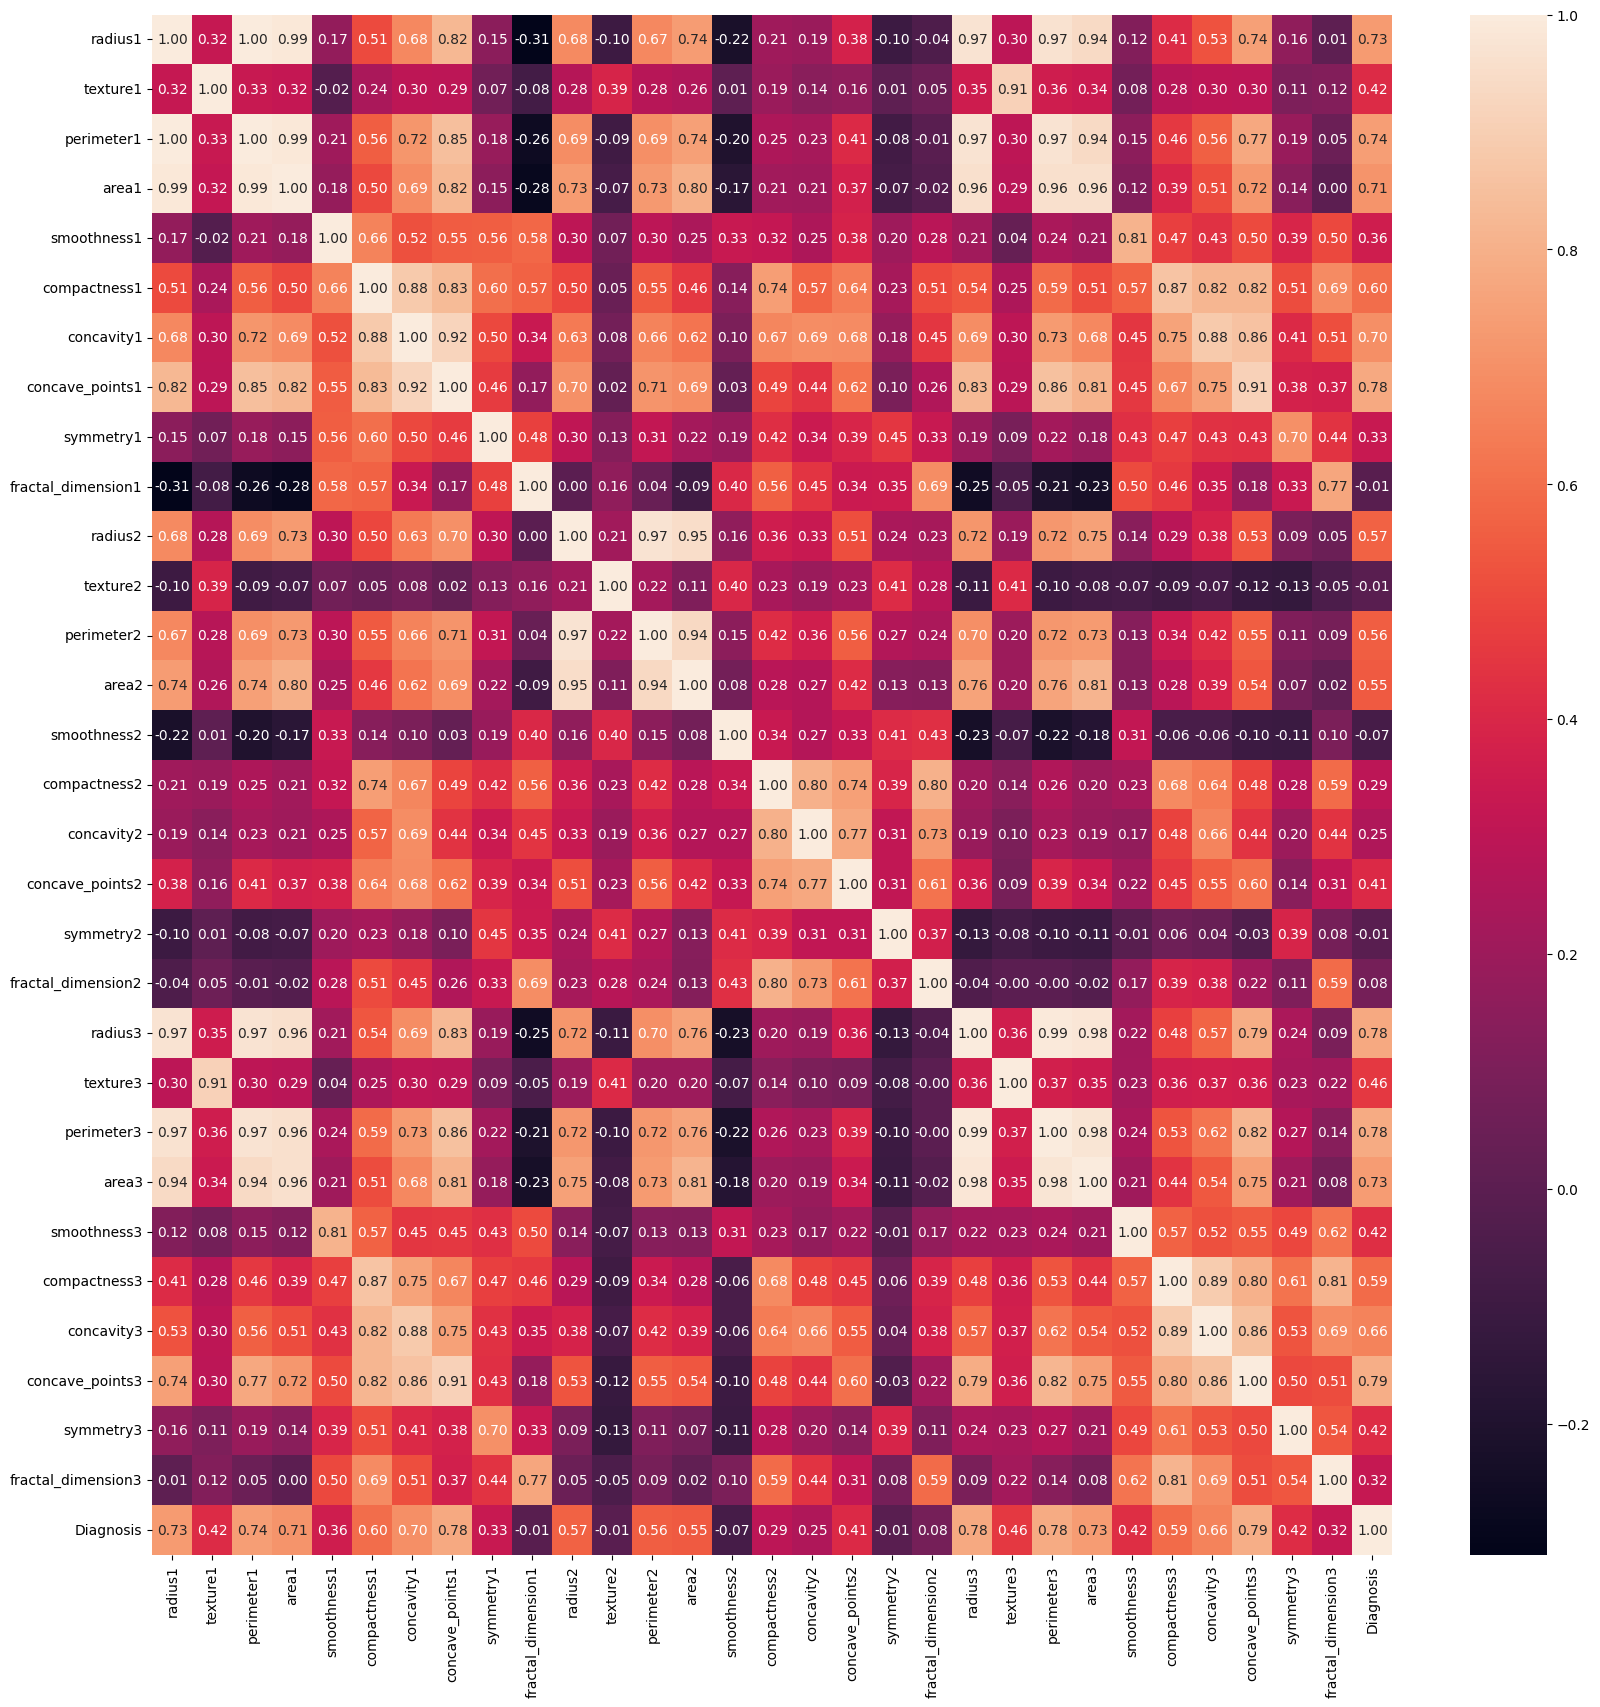

In [20]:
# Display the correlation matrix as a graph using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

Drop attributes that have a correlation coefficient less than 0.50

In [23]:
df_corr = df.drop(columns=['texture1', 'smoothness1', 'symmetry1', 'fractal_dimension1', 'texture2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'texture3', 'smoothness3', 'symmetry3', 'fractal_dimension3'])

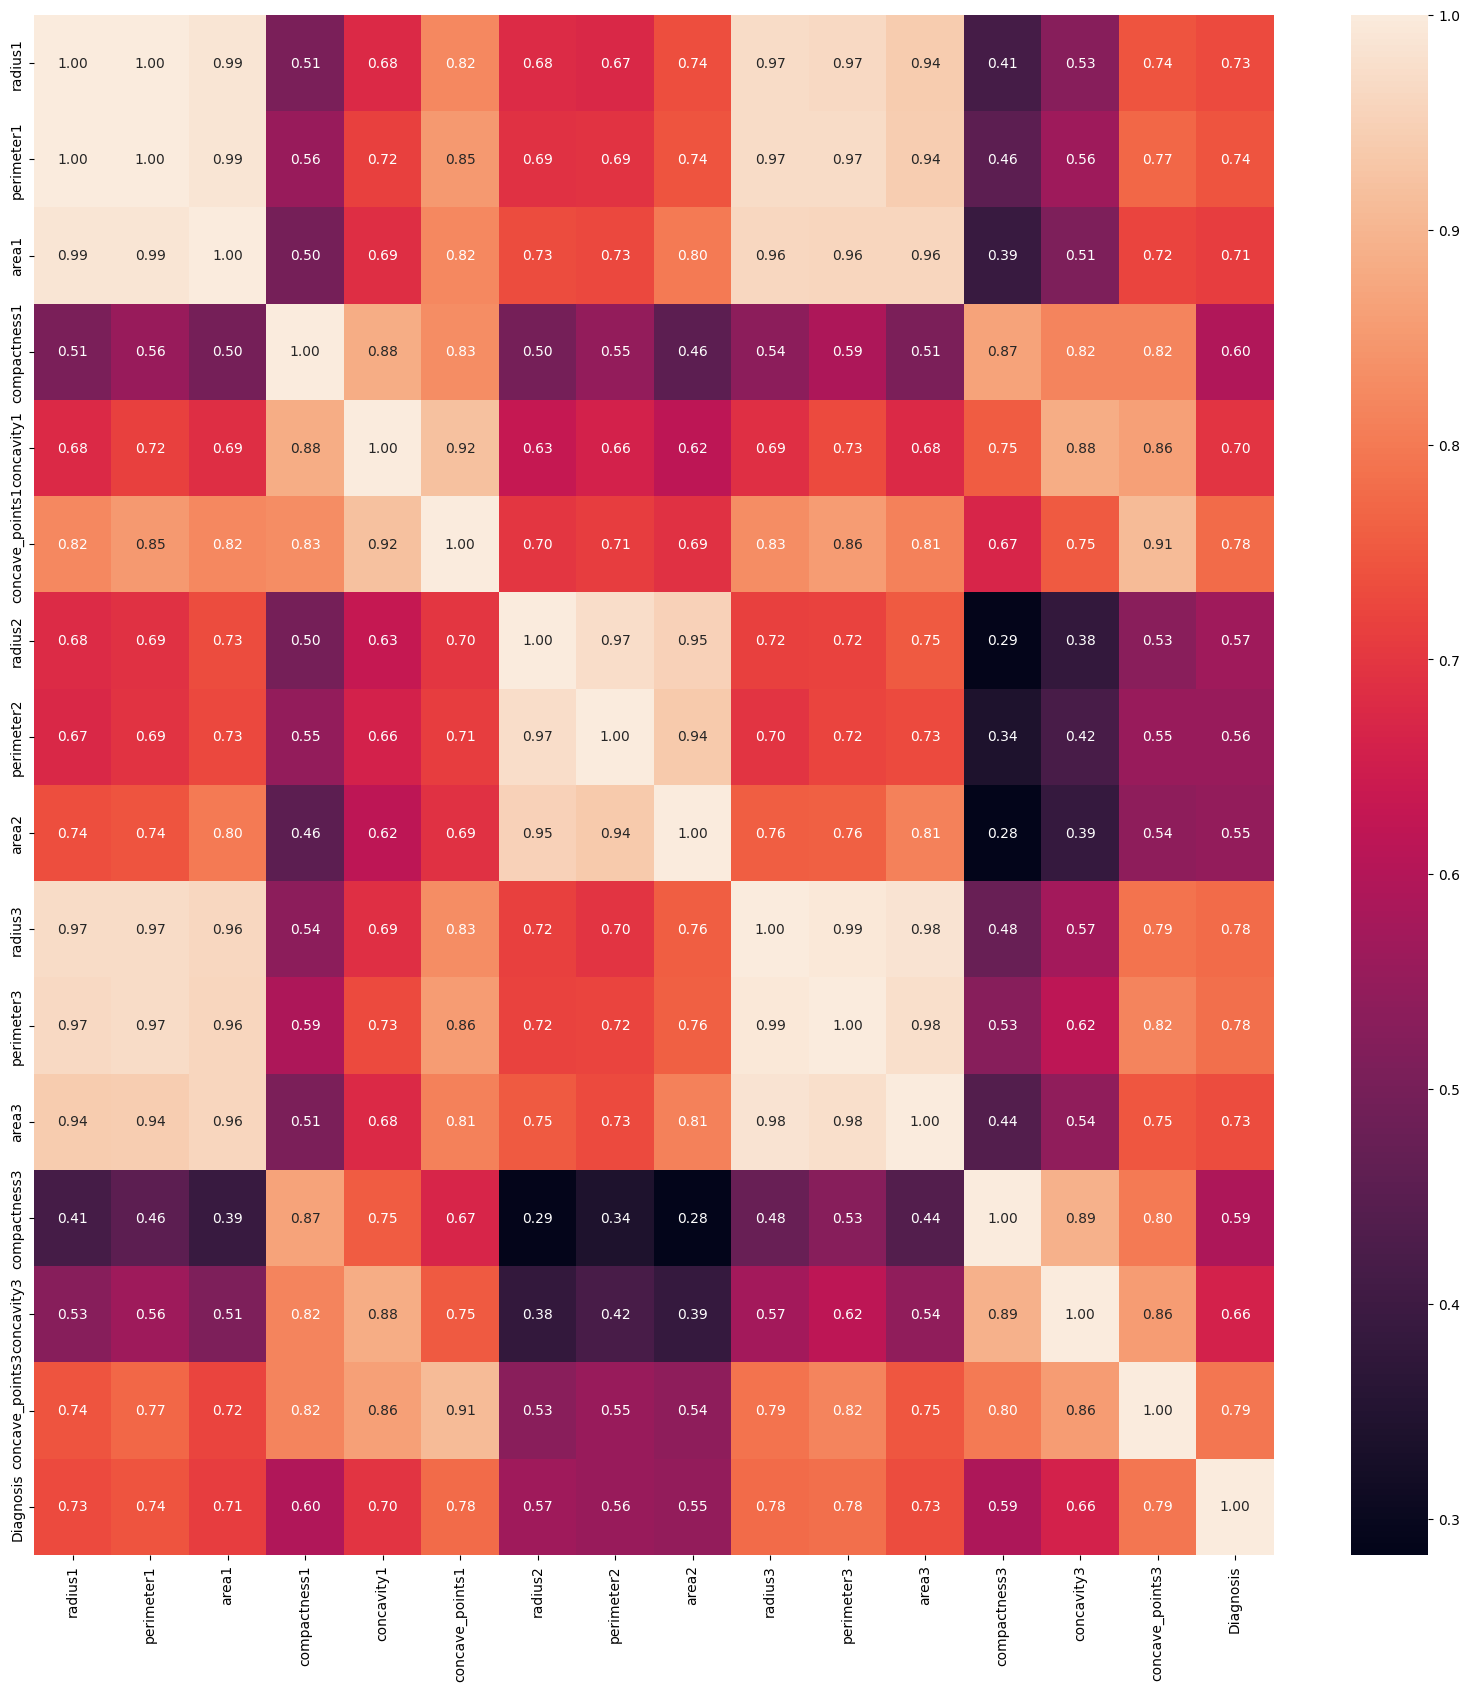

In [24]:
correlation_matrix = df_corr.corr()

# Display the correlation matrix as a graph using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()